# Board games

First we import the necessary modules:
- **pygame** and all the constants defined in _pygame.locals_
- **numpy** to represent and simulate the game
- **matplotlib.pyplot** to display the board in Jupyter

Finally the pygame module needs to be initialized.

In [1]:
import pygame
from pygame.locals import *
import numpy as np
import matplotlib.pyplot as plt
pygame.init()

(6, 0)

In [2]:
def show(surf, **kwargs):
    img = pygame.surfarray.pixels3d(surf)
    plt.imshow(np.transpose(img, (1, 0, 2)), **kwargs)
    plt.tick_params(axis='both', bottom=False, top=True, 
                    labelbottom=False, labeltop=True)

The main colors are defined.

In [4]:
BLACK = (0, 0, 0)
WHITE = (255, 255, 255)
RED = (255, 0, 0)
GREEN = (0, 255, 0)
BLUE = (0, 0, 255)
YELLOW = (255, 255, 0)
CYAN = (0, 255, 255)
MAGENTA = (255, 0, 255)
GRAY = (127, 127, 127)

## Defining the screen

<rect(0, 0, 300, 120)>


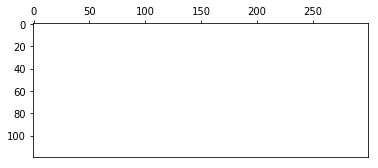

In [5]:
SCREEN = pygame.Rect(0, 0, 300, 120)
s = pygame.Surface(SCREEN.size)
s.fill(WHITE)
print(s.get_rect())
show(s)

## Grid-based games : Board class

The Board class creates a $n\times m$ grid. Each tile can be colored, have a label or be an image.

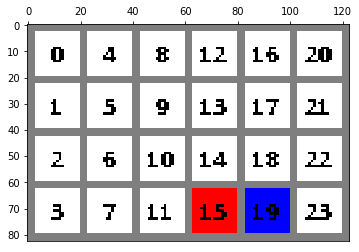

In [19]:
class Board():
    def __init__(self, nx=4, ny=4, dx=20, dy=20, x0=10, y0=10, gap=2, bg=WHITE):
        """ Create a (nx, ny) grid of tile-size (dx, dy) placed at (x0, y0) on the screen. """
        self.nx = nx
        self.ny = ny
        self.dx = dx
        self.dy = dy
        self.gap = gap
        self.rect = pygame.Rect(x0, y0, nx*dx+gap, ny*dy+gap)
        self.image = pygame.Surface(self.rect.size)
        self.image.fill(bg)
        self.grid_col = GRAY
        self.bg = bg
        self.color_list = (WHITE, BLACK, RED, GREEN, BLUE, YELLOW, CYAN, MAGENTA, GRAY)
        self.colors = np.random.randint(8, size=(nx, ny))
        self.grid = np.zeros((nx, ny))
        self.font = pygame.font.SysFont('Calibri', dy//2, True)
        self.labels = np.arange(nx*ny).reshape((nx, ny))     
        self.image_list = []
        self.images = np.zeros((nx, ny), dtype='int')
        #self.set_tile(1, 1, RED)
        
    def get_tile_rect(self, x, y):
        " Return a rectangle Rect for tile (x, y)."
        x0 = self.gap+x*self.dx
        y0 = self.gap+y*self.dy
        w = self.dx-self.gap
        h = self.dy-self.gap
        return pygame.Rect(x0, y0, w, h)
        
    def draw(self):
        " Draw the whole boardgame on screen s"
        s.blit(self.image, self.rect)

    def set_cols(self):
        col = self.grid_col        
        for i in range(self.nx+1):
            x = i*self.dx
            rect = pygame.Rect(x, 0, self.gap, self.rect.h)
            pygame.draw.rect(self.image, col, rect, 0)
    
    def set_rows(self):
        col = self.grid_col
        for i in range(self.ny+1):
            y = i*self.dy
            pygame.draw.rect(self.image, col, pygame.Rect(0, y, self.rect.w, self.gap), 0)

    def set_grid(self):
        self.set_rows()
        self.set_cols()
        
    def set_tile(self, x, y, col):
        rect = self.get_tile_rect(x, y)
        pygame.draw.rect(self.image, col, rect, 0)
    
    def set_tiles(self):
        for x in range(self.nx): 
            for y in range(self.ny):
                col = self.color_list[self.colors[x, y]]
                self.set_tile(x, y, col)
                
    def set_label(self, x, y, label):
        text = self.font.render(label, False, BLACK)
        text_rect = text.get_rect()
        text_rect.center = self.get_tile_rect(x, y).center
        self.image.blit(text, text_rect)
        
    def set_labels(self):
        for x in range(self.nx): 
            for y in range(self.ny):
                self.set_label(x, y, str(self.labels[x, y]))
                
    def add_image(self, path):
        img = pygame.image.load(path)
        self.image_list.append(img)
        
    def set_image(self, x, y, i):
        img = self.image_list[i]
        img_rect = img.get_rect()
        img_rect.center = self.get_tile_rect(x, y).center
        self.image.blit(img, img_rect)
 
    def set_images(self):
        for x in range(self.nx): 
            for y in range(self.ny):
                self.set_image(x, y, self.images[x, y])

board = Board(6, 4, dx=20, dy=20, gap=3)

s.fill(WHITE)
board.set_grid()
board.set_tile(3, 3, RED)
board.set_tile(4, 3, BLUE)
board.set_labels()
board.draw()
show(board.image)

The Board class produces a board-sized image. It can be drawn within a screen surface together with other elements (score, message).

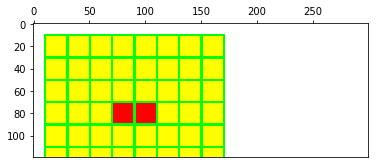

In [61]:
s.fill(WHITE)
board.draw()
show(s)

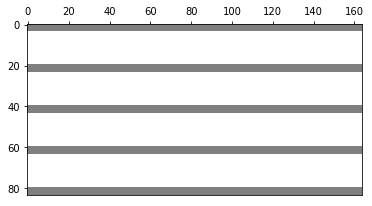

In [21]:
board = Board(8, 4, gap=4)
board.set_rows()
show(board.image)

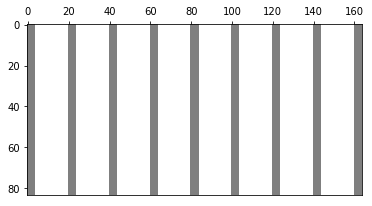

In [20]:
board = Board(8, 4, gap=4)
board.set_cols()
show(board.image)

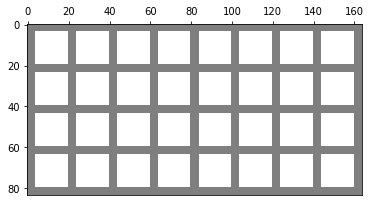

In [22]:
board = Board(8, 4, gap=4)
board.set_grid()
show(board.image)

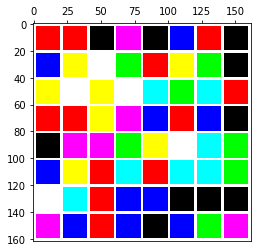

In [23]:
board = Board(8, 8)

s.fill(WHITE)
board.set_tiles()
board.draw()
show(board.image)

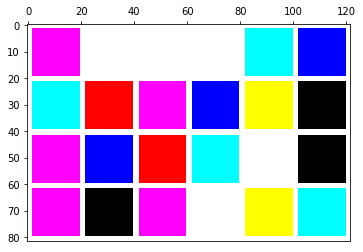

In [24]:
b2 = Board(6, 4)
b2.set_tiles()
show(b2.image)

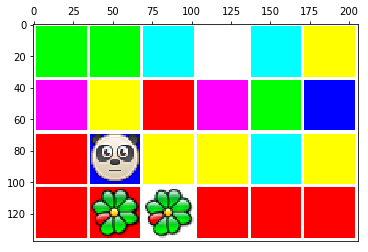

In [25]:
b2 = Board(6, 4, dx=34, dy=34)
b2.add_image('panda.png')
b2.add_image('flower.png')
b2.set_tiles()
b2.set_image(1,2,0)
b2.set_image(1,3,1)
b2.set_image(2,3,1)
show(b2.image)

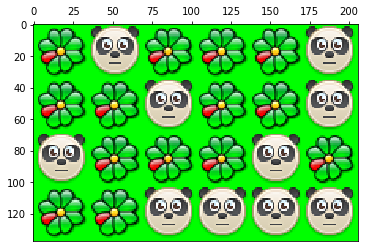

In [147]:
b2 = Board(6, 4, dx=34, dy=34, bg=GREEN)
b2.add_image('panda.png')
b2.add_image('flower.png')
b2.images = np.random.randint(2, size=(6, 4))
b2.set_images()
show(b2.image)

In [149]:
b2.images.transpose()

array([[1, 0, 1, 1, 1, 0],
       [1, 1, 0, 1, 1, 0],
       [0, 1, 1, 1, 0, 1],
       [1, 1, 0, 0, 0, 0]])

## Snake

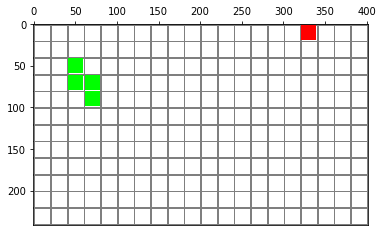

In [234]:
class Snake(Board):
    def __init__(self, *args):
        super().__init__(*args)
        self.snake = [[2, 2], [2,3], [3,3], [3, 4]]
        self.apple = self.get_rand_pos()
        self.vect = np.array([[1, 0], [0, 1], [-1, 0], [0, -1]])
        self.dir = 0
        
    def get_rand_pos(self):
        x = np.random.randint(self.nx)
        y = np.random.randint(self.ny)
        return (x, y)

    def set(self):
        self.set_tile(self.apple[0], self.apple[1], RED)
        
    def set_snake(self):
        for i in self.snake:
            self.set_tile(i[0], i[1], GREEN)
        
    def move_snake(self):
        s0 = self.snake[0] + self.vect[self.dir]
        self.snake.insert(0, s0)
        self.snake.pop()
        
b3 = Snake(20, 12)
b3.set_grid()
b3.set_snake()
b3.set()
show(b3.image)

In [162]:
[2, 0] in snake

False

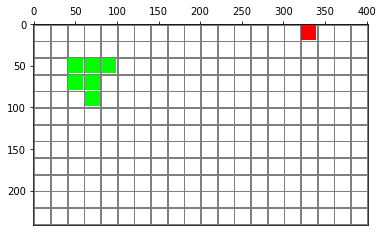

In [236]:
b3.move_snake()
b3.set_snake()
show(b3.image)

## Tetris

## Minesweeper

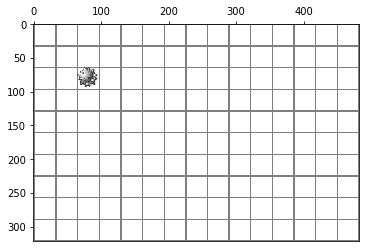

In [269]:
class Mines(Board):
    def __init__(self, mines=3, *args):
        super().__init__(*args)
        self.set_grid()
        self.add_image("mines.png")
        self.set_image(2, 2, 0)
        self.mines = mines

    def set_mines():
        a = np.array([1]*self.mines + [0]*(self.nx*self.ny-self.mines))
        np.random.shuffle(a)
        a.resize(nx, ny)
                           
m = Mines(3, 15, 10, 32, 32)
show(m.image)

Creating n random mines

In [271]:
nx = 6
ny = 4
mines = 10
a = np.array([1]*mines + [0]*(nx*ny-mines))
np.random.shuffle(a)
a.resize(nx, ny)
a

array([[0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 1, 0, 0],
       [1, 0, 1, 1]])

In [275]:
a[0:3, 0:3]

array([[0, 0, 1],
       [0, 0, 1],
       [0, 0, 1]])

In [29]:
import sys, pygame
pygame.init()

size = width, height = 320, 240
speed = [2, 2]
black = 0, 0, 0

screen = pygame.display.set_mode(size)

ball = pygame.image.load("flower.png")
ballrect = ball.get_rect()

screen.fill(black)
screen.blit(ball, ballrect)
pygame.display.flip()